# Project 1: Titanic Visualizations
## Matplotlib and Seaborn for Visualization
## Due Date: DD/MM/YY, 11:59 PM PST

**Collaboration Policy**

Who else did you work with on this homework? In case of course events, just describe the
group. How did you work on this homework? Any comments about the homework? 

**Collaborators**: *list collaborators and comments here*

Please copy the following statement and sign next to it. We just want to make it extra clear so
that no one inadvertently cheats.  

*I certify that all solutions are entirely in my words and that I have not looked at another
student’s solutions nor have I looked at any online solutions to any of these problems. I have
credited all external sources in this write up.*

**Pledge**: *please copy the above statement and sign your name here*

## This Assignment
In this project, you will use what you've learned in class to analyze relationships within the Titanic Dataset using a wide range of visualization techniques. Grading will mainly be based on the quality of your plots following our instruction, and quality of your written responses after various plotting questions.

After this project, you should feel comfortable with the following:

- Plotting data using many types of graphs present in the`seaborn` and `matplotlib` libraries.
- Changing properties of your plots, such as figure size, titles, label names, the x and y values, and x and y limits, etc.
- Drawing conclusions and making predictions about the data based on your visualizations.

## Score Breakdown
Question | Points
--- | ---
0 | 0
1a | 2
1b | 2
1c | 2
2a | 3
2b | 2
2c | 2
2d | 1
2e | 3
3a | 1
3b | 2
3c | 2
3d | 3
3e | 3
3f | 1
3g | 1
4a | 1
4b | 1
4c | 2
4d | 1
5a | 1
5b | 1
5c | 1
5d | 2
5e | 1
Total | 41

## Question 0 - Loading Our Data

---

This project will take advantage of data visualization to gain some insight into a dataset of Titanic passengers. The dataset we will be working with contains several attributes of titanic passengers and whether or not they survived.

Here is a data dictionary for reference:

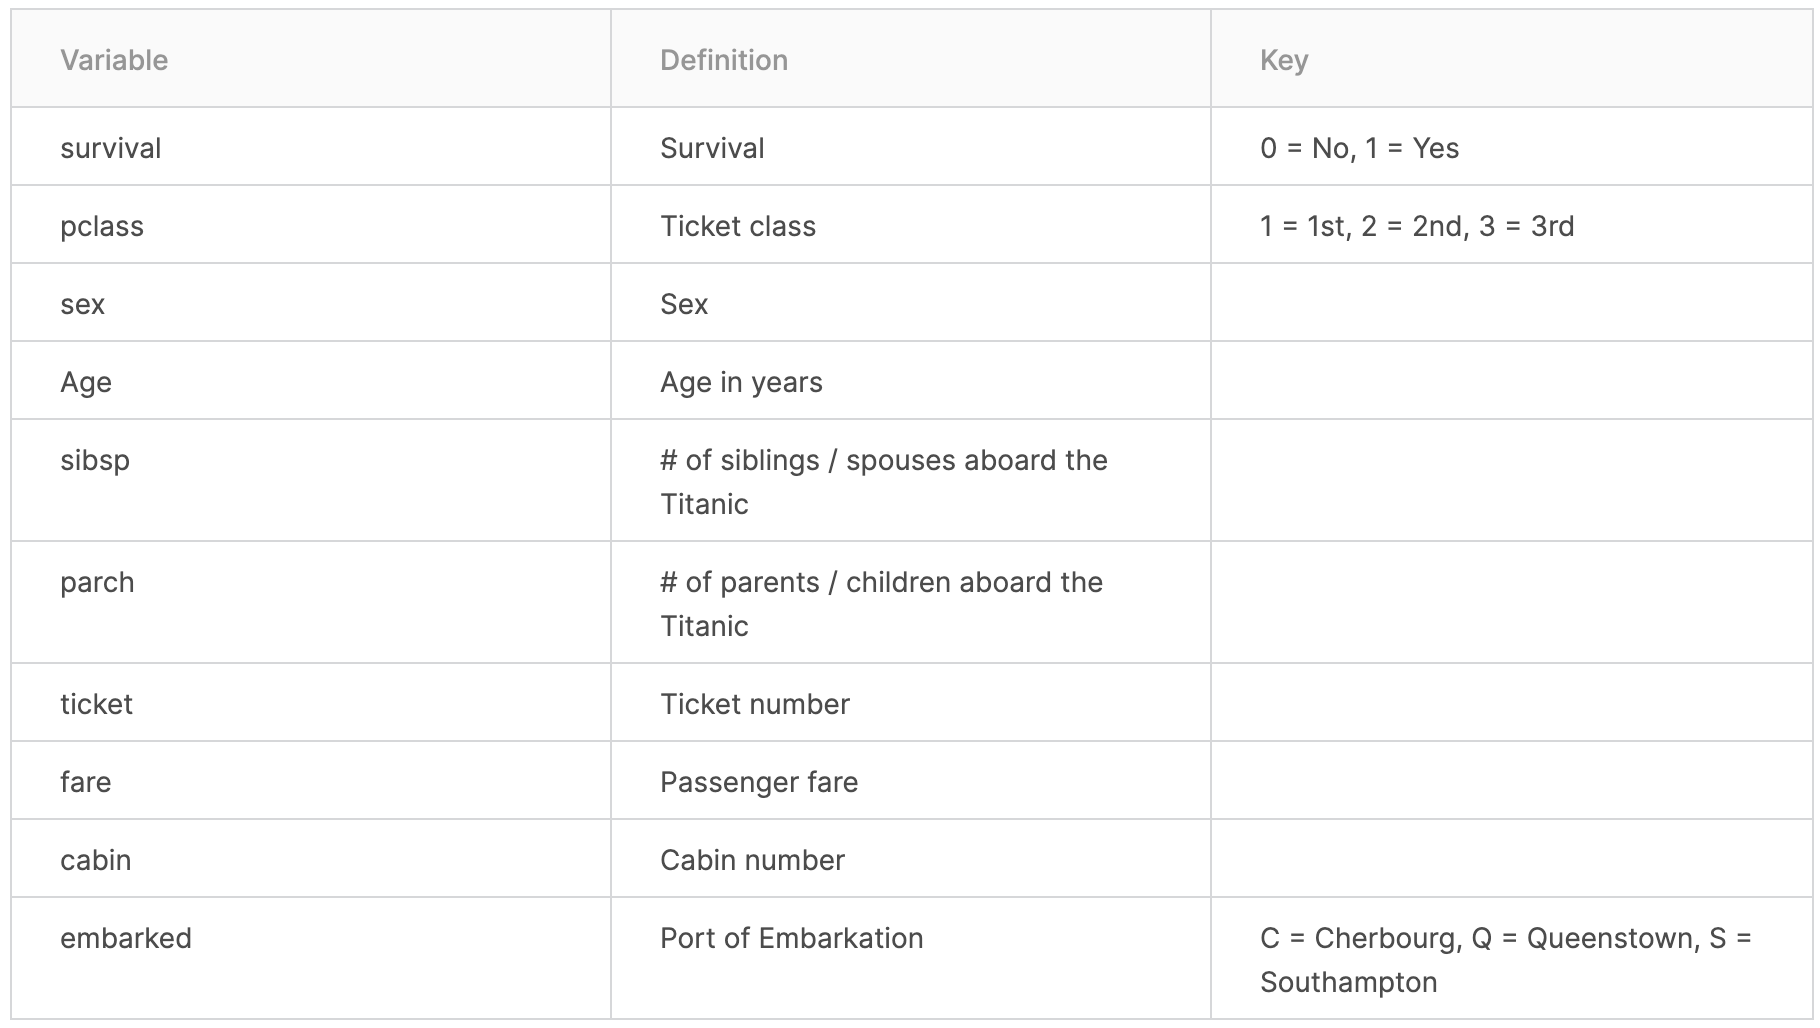

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'times new roman'

Most of the time you will training and a testing set in machine learning. A file for each is included in this folder, called titanic_train.csv and titanic_test.csv. However, for this project we will only be looking at the training data.

In [3]:
train_df = pd.read_csv("titanic_train.csv")

## Question 1 - Visualizing the Survivors and EDA

---
An important part to machine learning and data science is exploring datasets to get ahold of what you're working with. In general, this is called **Exploratory Data Analysis** or **EDA** for short. This notebook will essentially be an EDA on the titanic dataset. We will visualize a bunch of the different parts of the dataset to see if we can qualitatively visually identify anything interesting that we might want to look at closer later with some form of modeling.  


Let's start by taking a look at the columns in our dataset and some of their values. Print the head of the training dataframe. We only want to look at the training dataframe for this analysis, as we want to leave our test set untouched.

In [4]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Question 1a
To start, run the cell below to visualize the number of people that survived vs the number of people that died.

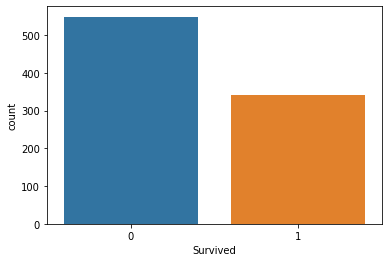

In [5]:
sns.countplot(data=train_df, x="Survived")

This graph is pretty ugly... we need to tidy it up. Give the graph a title and also resize it so that it's readable. It's way too small right now. In addition, the y label "count" is not very descriptive, let's give that a better name too.  
**Hints:**
*   There are many ways to do this, I'd recommend looking on stack overflow and reading the [`sns.countplot`](https://seaborn.pydata.org/generated/seaborn.countplot.html) documentation. 


Text(0, 0.5, 'Number of People')

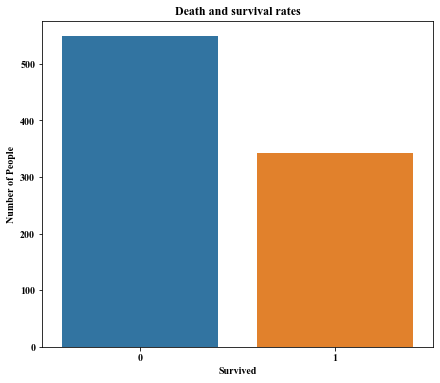

In [40]:
### SOLUTION
a4_dims = (7, 6)
fig, ax = plt.subplots(figsize=a4_dims)
ax.set_title("Death and survival rates")
sns.countplot(ax = ax, data=train_df, x="Survived")
ax.set_ylabel("Number of People")


You fell for our trap! We were devious and snuck some code up above to change the fonts globally so all the plots you make will have times new roman as the default font, which is pretty unreadable! Change the global font using matplotlib's [`rcparams`](https://matplotlib.org/tutorials/introductory/customizing.html) to Times New Roman.

In [41]:
# SOLUTION
plt.rcParams['font.family'] = 'arial'

### Question 1b
Alright, we finally have something presentable, well done. Now let's look a little further into what's going on behind the scenes with the `Survived` variable. Make a side by side bar plot of the number of people that died and survived, with one bar plot for all the men and one bar plot for all the women.  
**Hints:**


*   check out [`sns.catplot`](https://seaborn.pydata.org/generated/seaborn.catplot.html) or [`sns.barplot`](https://seaborn.pydata.org/generated/seaborn.barplot.html)



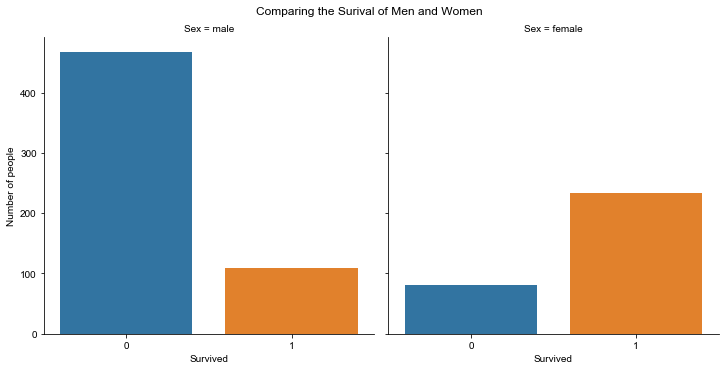

In [42]:
### SOLUTION

fig = sns.catplot(data=train_df, x="Survived", col="Sex", kind = "count")

fig.fig.suptitle('Comparing the Surival of Men and Women', fontsize=12, y=1.02)
fig.set_ylabels("Number of people")


More women survive in this graph. A reason could possibly be something along the lines of women being prioritized when getting off the boat first into life rafts.

Let's also look a little closer at what's going on with the variable `Pclass`. The column name is not descriptive at all, but the class represents the class of the ticket of the passenger. 1 would be "First Class" and the best ticket, 2 would be "Second Class" and 3 would "Third Class". In fact, let's add a new column to the train_df called `Ticket Class` that has these more informative categories. Run the code below and print the head of the dataframe with our new column.

In [8]:
def ticket_class_func(passenger):
  pclass = passenger
  if pclass == 1:
    return "First Class"
  if pclass == 2:
    return "Second Class"
  else:
    return "Third Class"
train_df["Ticket Class"] = train_df["Pclass"].apply(ticket_class_func)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class


Now let's visualize this the difference in surivival counts between classes using three side by side barplots. (should be similar to above, with just one parameter changed). Our graph sucks though, so add in some lines to change the title of the figure that `catplot` returns. Also set the y labels to be something more descriptive.

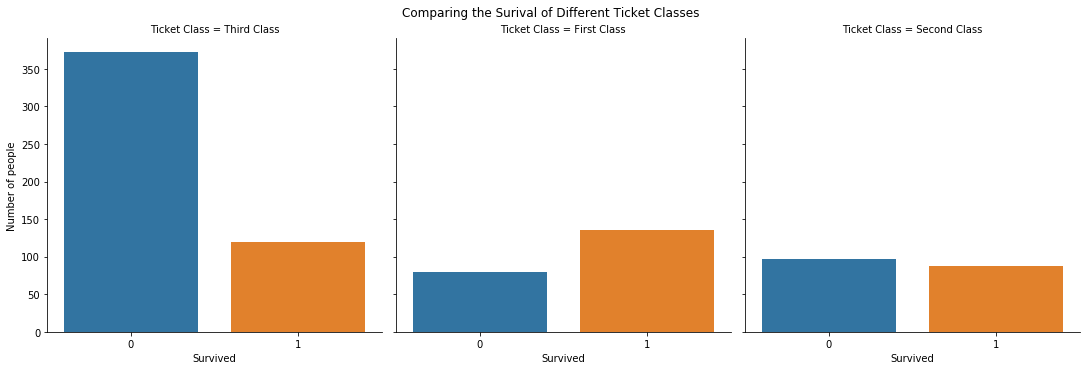

In [31]:
fig = sns.catplot(data=train_df, x="Survived", col="Ticket Class", kind = "count")

### SOLUTION
fig.fig.suptitle('Comparing the Surival of Different Ticket Classes', fontsize=12, y=1.02)
fig.set_ylabels("Number of people")

Ah, more interesting results.



### Question 1c
Now let's take a look at how `Age` influences our `Survived` variable. Let's make a barplot to visualize 10 year age bands and the survival rate of individuals in those age bands. Run the next two cells to set up some extra columns in our dataframe to do this.

In [10]:
def age_band(num):
    for i in range(1, 100):
        if num < 10*i :  return f'{(i-1) * 10} - {i*10}'

train_df['Age Band'] = train_df['Age'].apply(age_band)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Class,Age Band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,20 - 30
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,30 - 40
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,20 - 30
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,30 - 40
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,30 - 40


For your convenience, we will next define a dataframe called titanic_age to keep our age bands and we will define a column to store corresponding survival rates. Visualize the dataframe below.

In [11]:
titanic_age = train_df[['Age Band', 'Survived']].groupby('Age Band')['Survived'].value_counts().sort_index().unstack().fillna(0)
titanic_age['Survival rate'] = titanic_age[1] / (titanic_age[0] + titanic_age[1]) * 100
titanic_age.head()

Survived,0,1,Survival rate
Age Band,,,
0 - 10,24.0,38.0,61.290323
10 - 20,61.0,41.0,40.196078
20 - 30,143.0,77.0,35.000000
30 - 40,94.0,73.0,43.712575
40 - 50,55.0,34.0,38.202247


Now let's make our plot. Recreate this barplot using the train_df dataframe and titanic_age dataframe.

**Hints:**


*   First use `plt.subplots` to make a figure of size `(11.7, 8.27)` and axes for our plot.
* Use a seaborn axis level function to make a barplot and supply it the `Axes` object you got from running `subplots`
*   You will find `ax.annotate`, `ax.axhline` and `ax.set_title` very useful to change the artists for the mean label and line running through the plot



Text(0.5, 1.0, 'Survival rates by age band')

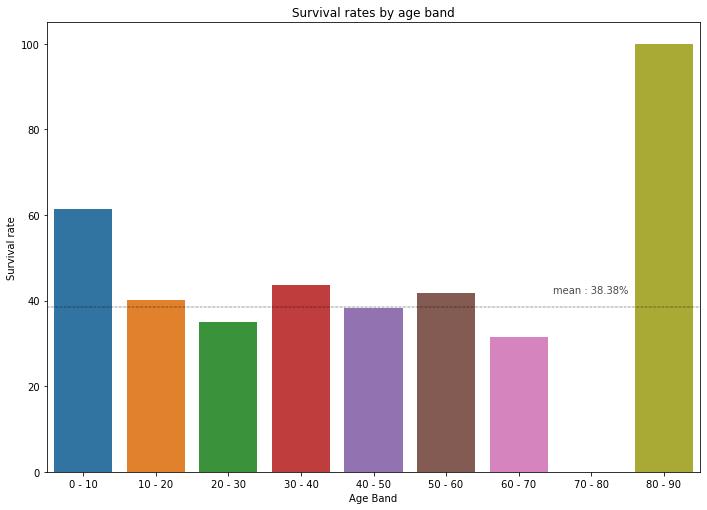

In [12]:
#Citation 1 - https://www.kaggle.com/subinium/awesome-visualization-with-titanic-dataset
### SOLUTION
fig, ax = plt.subplots(figsize=(11.7, 8.27))
g=sns.barplot(ax=ax,data=titanic_age, x=dict(titanic_age)[0].keys(), y="Survival rate")


mean = train_df['Survived'].mean() *100
ax.axhline(mean ,color='black', linewidth=0.4, linestyle='dashdot')
ax.annotate(f"mean : {mean :.4}%", 
            xy=(7, mean + 4),
            va = 'center', ha='center',
            color='#4a4a4a',
            )
ax.set_title("Survival rates by age band")

## Question 2 - "Save the women and the children! (as long as they're rich)"


---


With our interesting preliminary results from above, let's take a closer look at age, class, and sex, and how they are distributed with regards to our Survivors and Dead passengers. 

### Question 2a
Visualize the distribution of age with a shaded KDE plot. It should look like the following.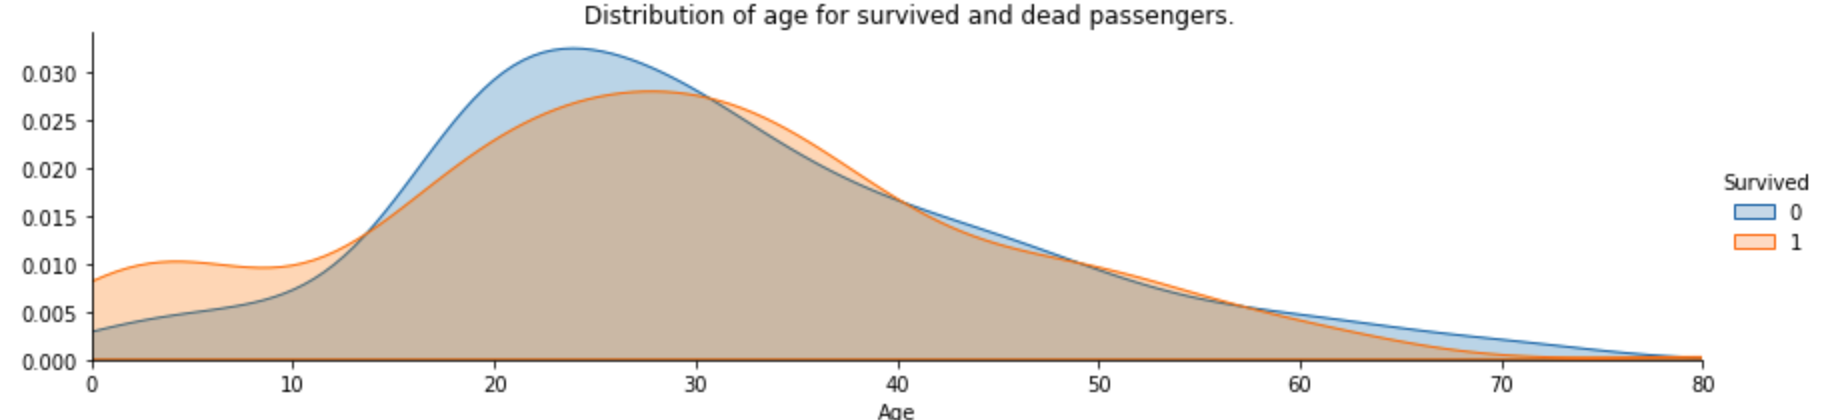

**Hints**:
* First use `sns.FacetGrid` to make a new FacetGrid object with the `aspect` = 4
* Then use the `map` function to map an axis level seaborn function
* Set the `xlim` to be the oldest age in the dataset for the FacetGrid
* Add title with `Figure.suptitle`. For a given `FacetGrid`  object `g`, we can access its figure with `g.fig`. We want the title font to be 12, and make sure to set `y=1.02` as well to make sure it's placed properly on the graph.
* Add a legend to the `FacetGrid` object using `g.add_legend`

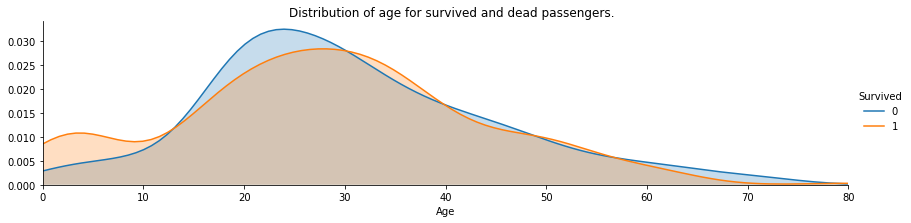

In [13]:
#SOLUTION
oldest = max(train_df["Age"])
g = sns.FacetGrid(train_df, hue="Survived",aspect=4)
g.map(sns.kdeplot,'Age',shade= True)
g.set(xlim=(0,oldest))

g.fig.suptitle("Distribution of age for survived and dead passengers.", fontsize=12, y=1.02)
g.add_legend()


It's a little subtle, but there is a hump at the left tail of the survived graph that is due to a large number of children surviving.

Make an annotation on the graph around where the peak of the hump with the text "Small Peak".
**Hints:**
* You can access the `Axes` object for a given `FacetGrid` object `g` by using `axes = g.axes.flatten()`, which gives you an array of Axes objects.
* You will find the `Axes.annotate` method very useful.
* You can redraw an existing `FacetGrid` object g by leaving the statement
```
g.fig
```
at the end of the jupyter notebook cell



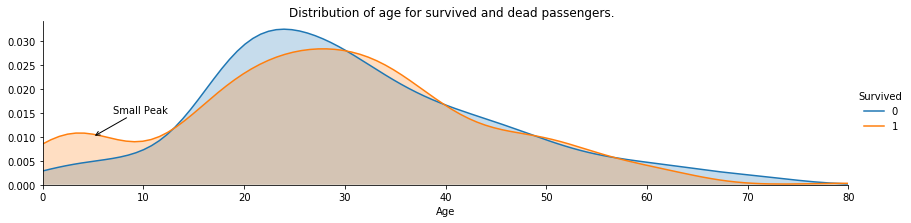

In [14]:
#SOLUTION
#TODO
g.ax.annotate("Small Peak", (5, .01), (7,0.015),arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"))
#END TODO
g.fig

### Question 2b

Now that we have a visualization of how passengers are distributed by age for both dead and alive individuals, let's start to break it down in terms of the other variables we explored in Question 1. To start, let's visualize the distribution for different both males and females. Visualize a side by side version of the above plot but now with one for males and one for the passengers that are females.  
**Hints:**
* When making a `FacetGrid` object, the parameter `col`  will be of interest to you

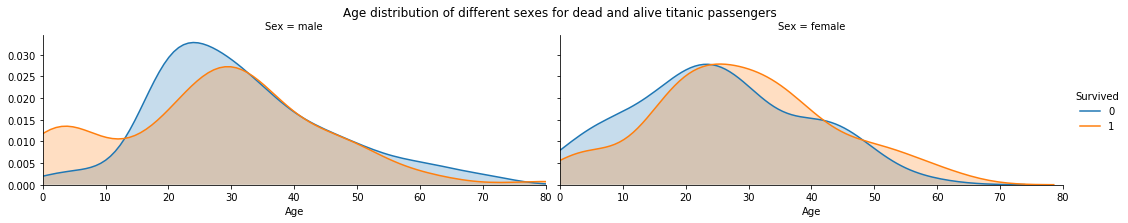

In [15]:
#SOLUTION
fig = sns.FacetGrid(train_df, hue="Survived",aspect=2.5, col="Sex")
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest))
fig.fig.suptitle("Age distribution of different sexes for dead and alive titanic passengers", fontsize=12, y=1.02)
fig.add_legend()

The hump is very prominent on the male side of the distribution. The female distribution actually had more female children die than the male.

### Question 2c 
Let's explore `Age` much deeper. You should've noticed a little hump at the lower ages of your distribution. We also discovered earlier that women survived more often in Question 1. That might be because children and women were prioritized for being saved on the titanic. However, let's take a closer look. Let's start by dividing up the data into "woman", "child" and "man". Run the following cell to add a new column to our dataframe that contains this classification.

In [16]:
def woman_child_or_man(passenger):
    age, sex = passenger

    if age < 16:

        return "child"
    else:
        return dict(male="man", female="woman")[sex]
train_df["who"] = train_df[["Age", "Sex"]].apply(woman_child_or_man, axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Class,Age Band,who
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,20 - 30,man
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,30 - 40,woman
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,20 - 30,woman
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,30 - 40,woman
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,30 - 40,man


Now visualize a shaded KDE plot like the ones above for just the "child" passengers. It should have 2 curves, one for survived passengers and one for dead.

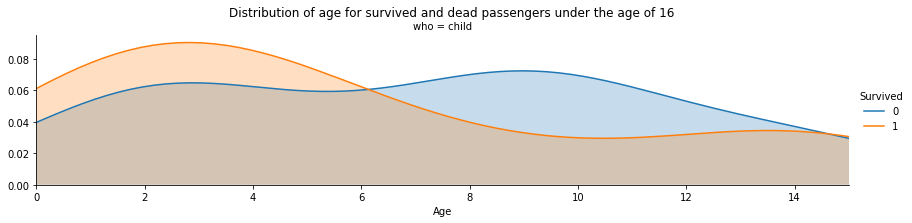

In [17]:
#SOLUTION
fig = sns.FacetGrid(train_df[train_df["who"]  == "child"],hue="Survived", row="who",aspect=4)
oldest_child = max(train_df[train_df["who"]  == "child"]["Age"])
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest_child))
fig.fig.suptitle("Distribution of age for survived and dead passengers under the age of 16", fontsize=12, y=1.02)
fig.add_legend()

### Question 2d
Now let's look at the male and female children. Split the above graph into two graphs, where row one has a KDE graph with 2 density curves for the male children and the second row graphs the data of the female children. Make sure to label the two plots "Male children" and "Female children" to look like the following:


INSERT IMAGE

**Hints:**
* You can access the axes of a FacetGrid `g` by using `axes = g.axes.flatten()`. This gives you an array of Axes objects.

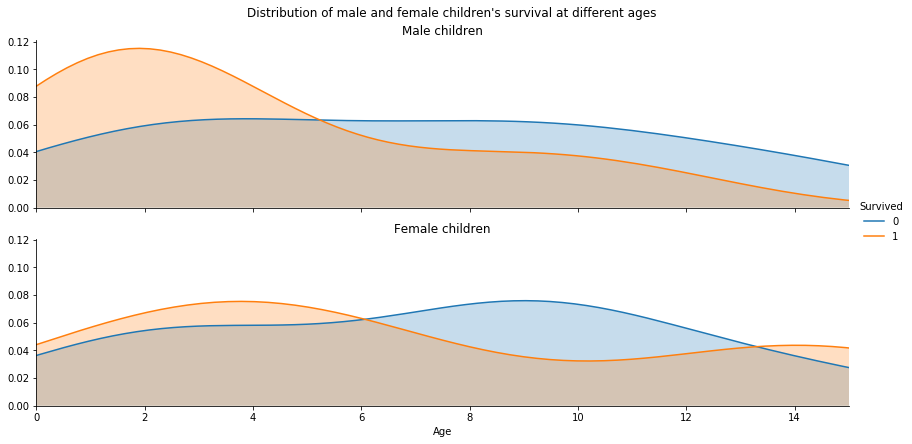

In [18]:
#SOLUTION
fig = sns.FacetGrid(train_df[train_df["who"]  == "child"],hue="Survived", row="Sex",aspect=4)

oldest_child = max(train_df[train_df["who"]  == "child"]["Age"])
fig.map(sns.kdeplot,'Age',shade= True)
axes = fig.axes.flatten()
axes[0].set_title("Male children")
axes[1].set_title("Female children")
fig.set(xlim=(0,oldest_child))
fig.fig.suptitle("Distribution of male and female children's survival at different ages", fontsize=12, y=1.02)

fig.add_legend()

### Question 2e
Now let's take a look at the distribution of the age of different classes. Create a similar density curve graph as in 2a except with 3 curves, one for each class.

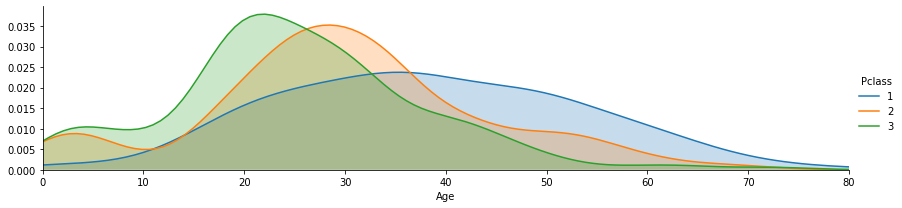

In [19]:
# SOLUTION
fig = sns.FacetGrid(train_df, hue="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest))
fig.add_legend()



Now let's explore how the income of the children affected their survival. Make three different graphs in this format:

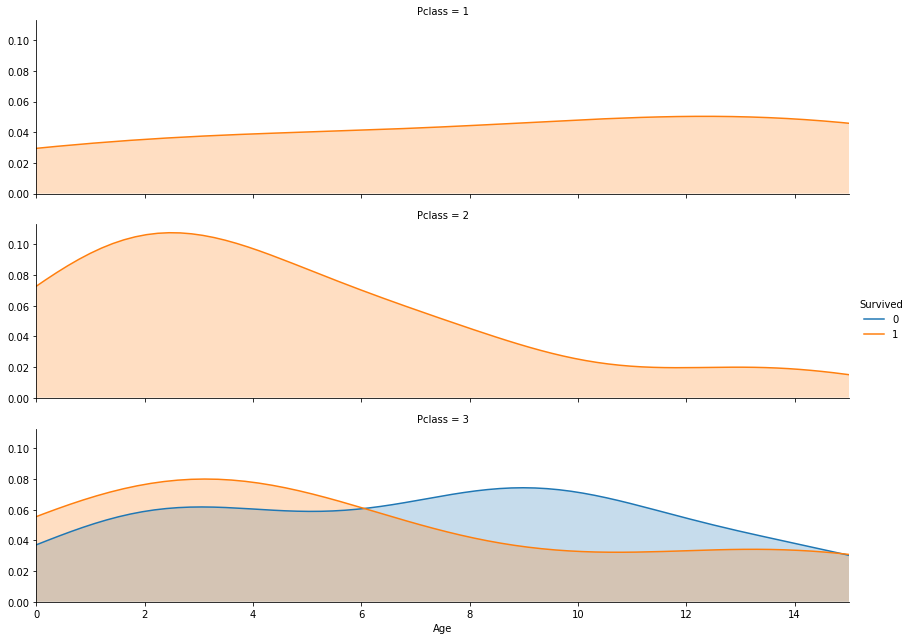

In [20]:
# SOLUTION
fig = sns.FacetGrid(train_df[train_df["who"]  == "child"],hue="Survived", row="Pclass",aspect=4)
oldest_child = max(train_df[train_df["who"]  == "child"]["Age"])
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest_child))
fig.add_legend()


Now let's look at our elderly. If you remember from question 1, the survival rate for the highest age band was high simiilar to the children. Let's visualize these "elderly". Run the following cell to make a new column in the dataset called `elderly` that has two classes, "not elderly" and "elderly". The elderly should be anyone over the age of 60. 

In [21]:
def elderly(passenger):
    age = passenger[0]

    if age > 60:
        return "elderly"
    return "not elderly"
train_df["elderly"] = train_df[["Age"]].apply(elderly, axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket Class,Age Band,who,elderly
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Third Class,20 - 30,man,not elderly
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,First Class,30 - 40,woman,not elderly
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Third Class,20 - 30,woman,not elderly
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,First Class,30 - 40,woman,not elderly
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Third Class,30 - 40,man,not elderly


Now visualize the distribution of age for the "elderly" passengers, separated by whether they survived or not. It should look like this:

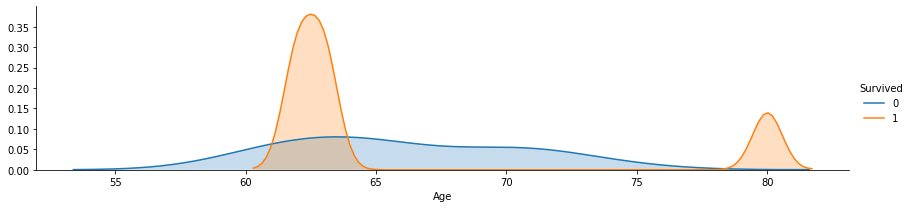

In [22]:
fig = sns.FacetGrid(train_df[train_df["elderly"]  == "elderly"],hue="Survived",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.add_legend()

Now split the above graph into three, one for each Pclass. It should look like the following.

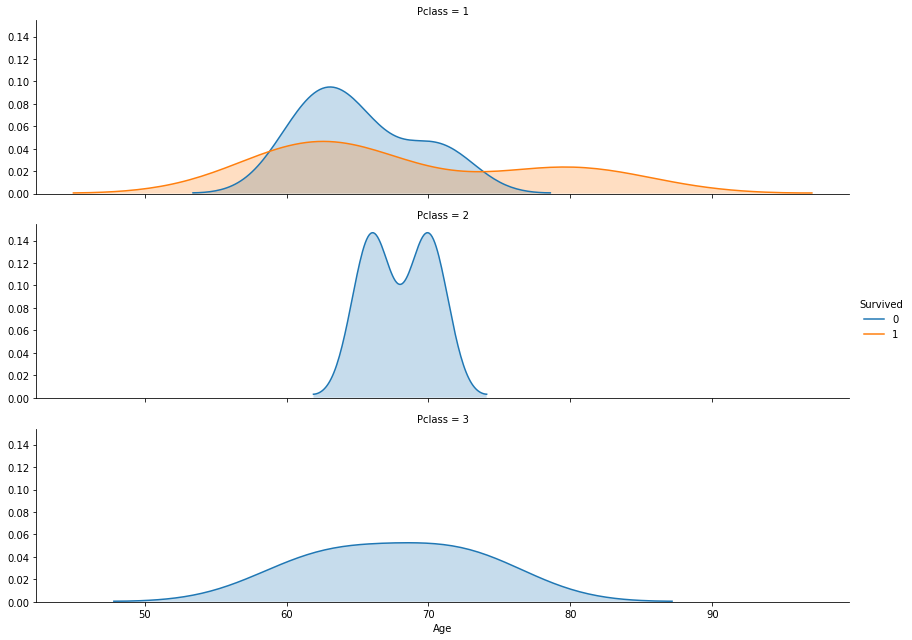

In [23]:
# SOLUTION
fig = sns.FacetGrid(train_df[train_df["elderly"]  == "elderly"],hue="Survived", row="Pclass",aspect=4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.add_legend()

## Question 3 - Exploring the Age and Fare of Passengers
Let's begin by comparing the relationship between our two of our dataset's quantitiative variables, `Age` and `Fare`.


### Question 3a

The histograms we plotted above are great for visualizing the distribution of varibles within our dataset, however, they are unable to show us how multiple variables vary together. In order to see how `Age` and `Fare` are related, use [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html) to create a scatterplot to visualize their relationship. Make sure to color the points in the scatterplot according to the passenger's `Sex`.


Text(0.5, 1, 'Comparison of Age vs Fare of Male and Female Passengers')

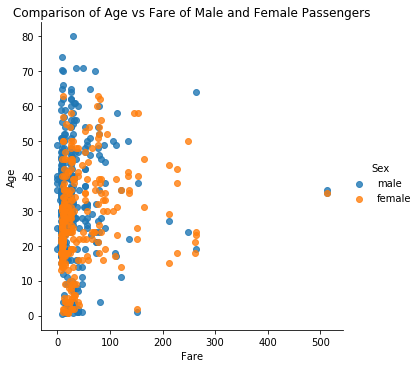

In [24]:
### SOLUTION
sns.lmplot(x="Fare", y="Age", hue="Sex", data=train_df, fit_reg=False, truncate=False)
plt.title("Comparison of Age vs Fare of Male and Female Passengers")

### Question 3b

Our current plot does a decent job of visualizing the data, however, there seems to be a heavy concentration of points with `Fare` less than 100. As a result, our graph appears overplotted, making it hard to visualize the data's true distribution. Luckily, seaborn provides a useful plot that will allow us to not only mitigate overplotting, but also encode more data with our visualization! Take a look at the [`sns.relplot`](https://seaborn.pydata.org/generated/seaborn.relplot.html) function and use it to create a new scatterplot where the size of each datapoint varies directly with the `Fare`.  

**Hints**:
* Take a look at the `sizes` parameter.
* Setting `alpha` and `height` parameter to an appropriate value may also help reduce overplotting.

Text(0.5, 1, 'Comparison of Age vs Fare of Male and Female Passengers')

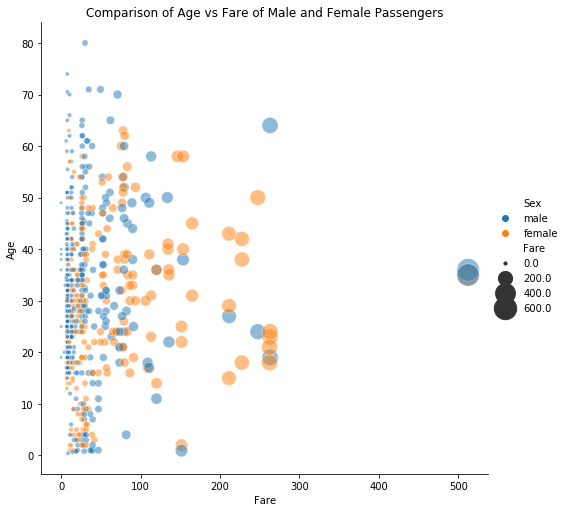

In [25]:
### SOLUTION
sns.relplot(x="Fare", y="Age", hue="Sex", size="Fare", sizes=(10, 500), alpha=.5, height=7, data=train_df)
plt.title("Comparison of Age vs Fare of Male and Female Passengers")

### Question 3c

**Answer the following about the above graph**:
* Do the smaller points make it easier to see our data's underlying distribution?  
* Why are we able to increase the datapoint size for points with larger `Fare` values without creating more overplotting? (Think in terms of the distribution of our `Fare` data). 
* In general, why do we try to minimize overplotting in our visualizations?
* There seems to be a fairly large amount of passengers that paid zero `Fare`. Is this some kind of error in our data / visualization? If not, what type of passengers do you believe paid zero `Fare`?


**SOLUTION**

Ideally, students will acknowledge that the smaller points allow us to more clearly see the spread of our data, and that the larger datapoints don't create more overplotting since there are significantly less of them for larger `Fare` values. In a general sense, they should recognize that when creating visualizations of our data, the whole point is to produce easily readable plots that allow readers to efficiently understand some relationship about the depicted variables. Overplotted graphs are not easily readable, and thus make is harder to see the true underlying relationship of our data. Finally, hopefully students will realize that the passengers who paid zero `Fare` are most likely crew members.

### Question 3d

Great job! While changing the size or spread of our points is one way to address overplotting, another perhaps simpler method is to switch plotting techniques entirely. For this question, we will use [`sns.kdeplot`](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) to create a kernal density estimate plot of our `Age` and `Fare` values. Make sure to have two seperate plots, one each for male and female passengers!

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

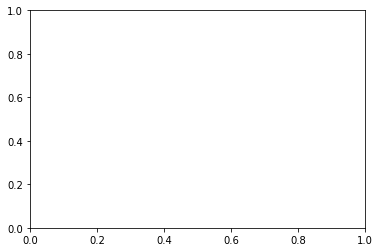

In [26]:
### SOLUTION
sns.kdeplot(data=train_df, x="Fare", y="Age", hue="Sex", fill=False)
plt.title("Comparison of Age vs Fare of Male and Female Passengers")

Nice! But notice how most of our data is on the left side of our graph. To fix this, let's plot again, making sure this time to set an appropriate limits for our x values. Make sure our x ticks are greater than 0 and count by 50.

**Hints**:
* Take a look at the `xlim` and `xticks` functions of `plt`

In [ ]:
### SOLUTION
sns.kdeplot(data=train_df, x="Fare", y="Age", hue="Sex", fill=False)
plt.title("Comparison of Age vs Fare of Male and Female Passengers")
plt.xlim(right=300)
plt.xticks([0, 50, 100, 150, 200, 250, 300])

### Question 3e

Nice! Hopefully now we have a better grasp on the true distribution of our data. However, for male and female passengers seem to have a relatively similar distrbution, and as a result, their respective kde plots are overlaid directly on top of eachother. Let's try splitting the plots up. We should create two new dataframes, one with all the male passengers, and one with all the female passengers. Then we will graph two KDE plots side by side, in order to better see these spreads individually. To do this, fill in the code below.

**Hints**:
* Take a look at the `ax` parameter.
* You're going to want to set a title for each provided axis

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(10, 4)

### SOLUTION
# Get male and female dataframe
male_df = train_df[train_df['Sex'] == 'male']
female_df = train_df[train_df['Sex'] == 'female']

# Graph your KDE plots on the appropriate axis
sns.kdeplot(data=male_df, x='Fare', y='Age', ax=ax1)
sns.kdeplot(data=female_df, x='Fare', y='Age', ax=ax2)

# Set the titles of the graphs
ax1.set_title('Comparison of Age vs Fare of Male Passengers')
ax2.set_title('Comparison of Age vs Fare of Female Passengers')

# Set the x limits of the graphs
ax1.set_xlim([0, 300])
ax2.set_xlim([0, 300])

### Question 3f

**Answer the following about the above graph**:
* In what ways do the KDE plots provide better for visualization of our data? In what ways are they worse?
* Looking at the KDE plots above, provide a range for both `Age` and `Fare` where distribution appears to be the densest.




**SOLUTION**

The KDE plots completely eliminated overplotting, and allow us to much more accurately see the ditribution of our data with small `Fare` values. However, we also see that becuase of all these small values, as well as the nature of KDE plots, out plot dips into negative `Fare` values, which we know does not exist.  

They appear the densest around 0-25ish `Fare` and 20ish-30ish `Age`.

### Question 3g
**A look ahead**:  

In the upcoming weeks, we will begin to learn about predictive models and featuring engineering. While you don't need to know the specifics for now, you can think of features as potential "qualities" of a particular class we are trying to predict. For example, imagine we had a model that took in an image of either a banana or an apple, and would output "APPLE" if it thought the image was of an apple, or "BANANA" if it thought the image was a banana. A good feature to implement into our model would be color. If the image was red, it's most likely an apple. If the image was yellow, it's most likely a banana. In general, we want our features to have some kind of relationship with whatever we are trying to predict. In our fruit example, the "yellowness" of the image is a pretty good indicator of whether or not the fruit image is of a banana.

**Our question to you**: 
This leads us to our question to you. If we were to build a model trying to predict the `Age` of a passenger, would `Fare` be a useful feature to incorporate into our model? In other words, based on the graphs above, do you see any relationship between the `Age` and `Fare` of a passenger? Why or why not?

**SOLUTION**  
We'll give partial credit to any student who does a decent job of describing any relationship they see between `Age` and `Fare`. However, ideally students will note the `Age` and `Fare` seem to be pretty unrelated, with no strong positive or negative realtionship between them. So perhaps it would be best to try using something else as a feature.

## Question 4 - Age, Survival Rates, and Data Spread 

Let's a closer look at the spread of our `Age` columns, and see how it differs between sexes and whether or not the passenger survived.

### Question 4a

To start, let's use the [`sns.boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) function to view spread of the `Age` of people who `Survived` vs those who did not. Make sure to set different colored boxplots depending on the `Sex` of the passenger.

In [ ]:
### SOLUTION
sns.boxplot(data=train_df, x="Survived", y="Age", hue="Sex")
plt.title("Spread of Age of Men and Women Who Did and Did not Survive")

### Question 4b

**Answer the following about the above graph**:
* Was the median age of surviving men higher or lower than the median female age? What about for those who did not survive?
* Of the surviving men, there seems to be an outlier. What was his age?



**SOLUTION**  
Students will hopefully notice that the non-surviving females have a lower median age than the non-surviving men, while the median seems to be about the same for those who did survive. It looks like there is an outlier male of age about 80.


### Question 4c

Our box plot is great for visualizing the spread of our data, however, it tells us nothing about how many datapoints make up each of the boxplots. To getter a better understanding of the density of our data, use [`sns.stripplot`](https://seaborn.pydata.org/generated/seaborn.stripplot.html) to overlay a strip plot over our box plot.

**Hints**:
* Take a look at the `zorder` parameter to make sure our strip plot is above the boxplot.
* Your boxplot code will be pretty much the same but try setting the `palette` to "vlag". (It will help differentiate it from the strip plot colors)

In [ ]:
### SOLUTION
sns.stripplot(x="Survived", y="Age", hue="Sex",data=train_df, dodge=True, alpha=0.75, zorder=1)
sns.boxplot(data=train_df, x="Survived", y="Age", hue="Sex", palette="vlag")
plt.title("Spread of Age of Men and Women Who Did and Did not Survive")

### Question 4d  
Beautiful! With new overlaid strip plot our graph look great! Plenty of information about both the spread and the frequency of our data within each boxplot. Now, comment on the densities of male and female passengers who survived and compare them with the non-surviving counterpart. Make sure to talk about the survival to death ratios of male and female passengers.


**YOUR ANSWER GOES HERE**  
The student will hopefully notice that more men died than survived, while more women survived than died. You should be able to tell this from the density of our strip plots.


Based on our plots, it appears than more men survived than died, while more women died than survived. But let's check for sure now. In the box below, set male_survive_rate and female_survive_rate equal to the rate of survival for each respective sex.

In [ ]:
male_survive_rate = train_df[(train_df['Sex'] == 'male') & (train_df['Survived'] == True)].size / train_df[(train_df['Sex'] == 'male')].size
female_survive_rate = train_df[(train_df['Sex'] == 'female') & (train_df['Survived'] == True)].size / train_df[(train_df['Sex'] == 'female')].size

print(male_survive_rate)
print(female_survive_rate)

Great! It seems our graphs provided a pretty good estimate for the actual survival rates.

## Question 5 - Exploring the Age, Sex and Wealth with Line Plots

---

For this section, we would like to explore how the male and female proportion varies across the different reported age groups. We would also like to see how this varies when wealth is taken into account. For the first part of this question, we would like to see how the male and female population is spread out in age.


### Question 5a
First we need group our data into age groups and obtain a count for each gender within these groups. Fill in the code below to obtain the data grouped in this fashion.


In [ ]:
### SOLUTION
def groupCount(titanic):
  grouped = titanic.groupby(['Age', 'Sex'])
  return grouped.size().to_frame('Count').reset_index()

grouped = groupCount(train_df)
grouped

### Question 5b
Now that we have the required data, we can visualize both by plotting an overlaid scatter plot using the [`sns.lmplot`](https://seaborn.pydata.org/generated/seaborn.lmplot.html). Fill the code below to build this visualization.

In [ ]:
sns.lmplot(data=grouped, x="Age", y="Count", hue="Sex")
plt.title("Count of Men and Women of Various Ages")


### Question 5c
Describe what you see above. What do we need to do to combine this information into a proportion versus age plot? Do you think that normalizing will make this graph more or less linear? Do we expect a linear relation? Why or why not? 


**SOLUTION**  
 To obtain a proportion versus age plot we need to be able to compare the number of males/females in a given year range. The scatter plot shows how the male/ female count varies as given by the data but does not combine approximate age groups, i.e those varying by less than year. By the tendency shown in the scatterplot we can expect to see linearity when the plot fixes age buckets and computes proportions. 

### Question 5d  
Fill in the method below to generate the data for a plot of `Age` versus `Sex` proportion. What things do we need to consider when constructing these proportions?

In [ ]:
### SOLUTION
def groupProp(titanic):
  # We can bin the age groups by bins by flooring all decimal numbers.
  def ageFloor(entree):
    age, _ = entree
    try:
      x = int(age)
    except:
      x = -1
    return x
  titanic["ageFloor"] = titanic[["Age", "Sex"]].apply(ageFloor, axis=1)
  nan_entries = titanic[titanic["ageFloor"] == -1].index
  titanic.drop(nan_entries, inplace=True)
  grouped = titanic.groupby(["ageFloor", "Sex"])
  grouped = grouped.size().to_frame('Count').reset_index()
  counted = {}
  for row in grouped.itertuples():
    if row.ageFloor not in counted:
      counted[row.ageFloor] = {0: None, 1: None}
    gen = 0 if row.Sex == 'male' else 1
    counted[row.ageFloor][gen] = row.Count
  # age, prop share indices AND prop holds male/female
  data = {"age": [], "proportion": []}
  for a, p in counted.items():
    if p[0] and p[1]:
      data["age"].append(a)
      data["proportion"].append(p[0]/p[1])
  return pd.DataFrame(data=data) 

In [ ]:
grouped = groupProp(train_df)

**SOLUTION**  
As long as students can adequately describe their thought process, they will be rewarded full credit. 

###Question 5e  
Use the data from the previous problem to produce a line plot of the proportions of the male and female population vs age.

In [ ]:
sns.lmplot(data=grouped, x="age", y="proportion")
plt.title("Proportion of Passengers of Various Ages")

## All Done!!!

Congrats!!! You have officially finished the project. Hopefully you feel prepped to visualize any dataset that life throws at you!